# by: Abdulrahman Saeed

## Project Summary
Telecom companies often struggle with customer churn, which refers to the number of customers who leave the company over a given period. In this project, we aimed to analyze the churn rate of a telecom company and identify the factors that contribute to customer churn.

### Problem Statement
Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer cancelled the subscription. Explore and analyze the data to discover key factors responsible for customer churn and come up with ways

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import sweetviz 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score, f1_score, roc_auc_score, roc_curve

### Variables Description

State : All 51 states

Account Length : How long account has been active

Area Code : Code Number of Area

lntl Plan : International plan activated ( yes, no )

VMail Plan : Voice Mail plan activated ( yes ,no )

VMail Message : No.of voice mail messages

Day Mins : Total day minutes used

Day calls : Total day calls made

Day Charge : Total day charge

Eve Mins : Total evening minutes

Eve Calls : Total evening calls

Eve Charge : Total evening charge

Night Mins : Total night minutes

Night Calls : Total night calls

Night Charge : Total night charge

Intl Mins : Total International minutes used

Intl Calls : Total International calls made

Intl Charge : Total International charge

CustServ calls : Number of customer service calls made

Churn : Customer churn (Target Variable True=1, False=0)

In [2]:
df = pd.read_csv('Telecom Churn.csv')
df

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6            

### Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

### summary statistic

In [4]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

### Check Missing Values

In [5]:
df.isna().any().sum()

0

### Check Duplicate Values

In [6]:
df.duplicated().sum()

0

## Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [7]:
labels = ['Not Churn(%)','Churn(%)']
values = df.Churn.value_counts()

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Total Percentage of Churn',)
fig.update_traces(marker=dict(colors=['#ffd700', '#008000']))

#### insights found from the chart
From the above chart we got to know that, there are 2850 customers which are not churned which is 85.5% of the whole customers data given in the dataset. In other hand, 483 customers are churned which is 14.5 % of the whole customers data given in the dataset.

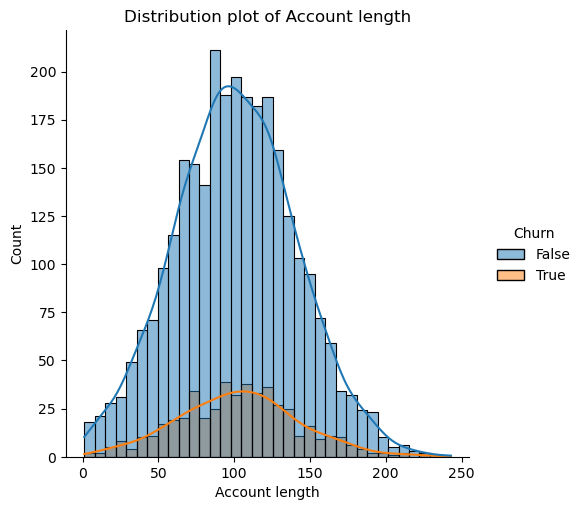

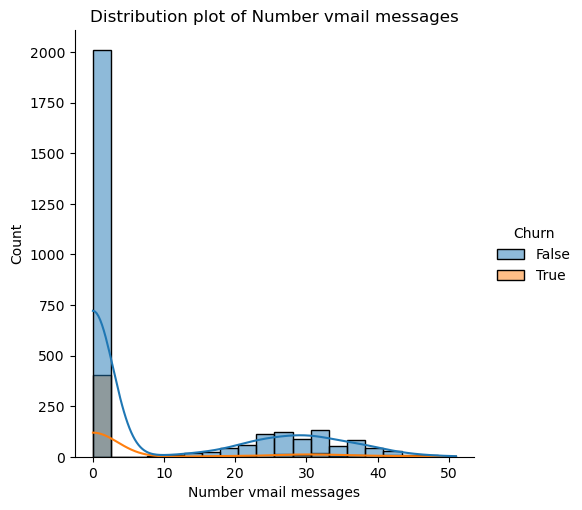

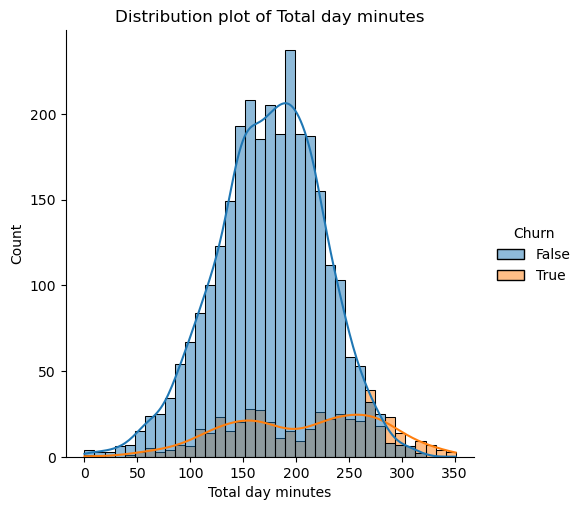

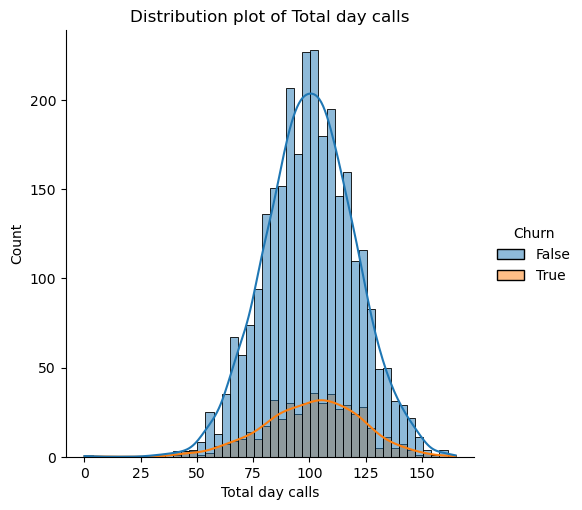

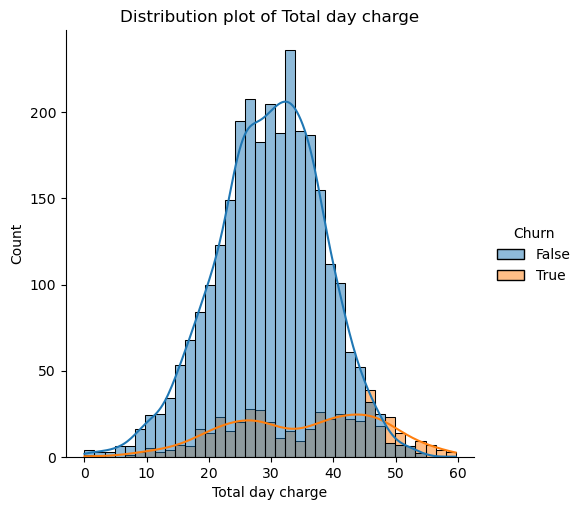

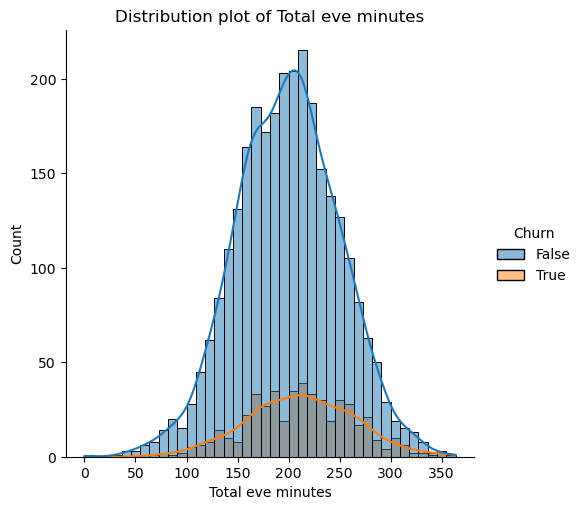

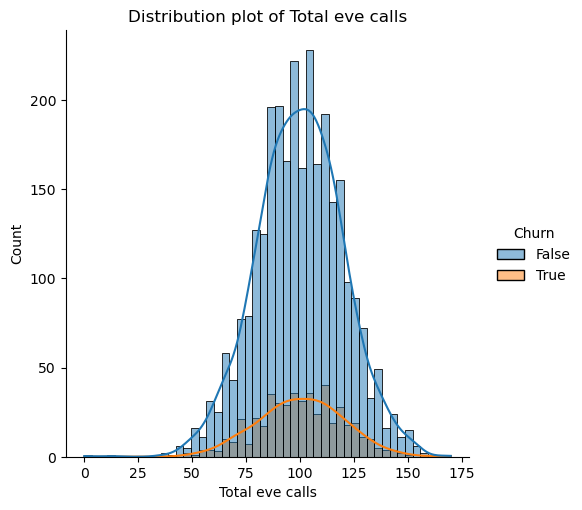

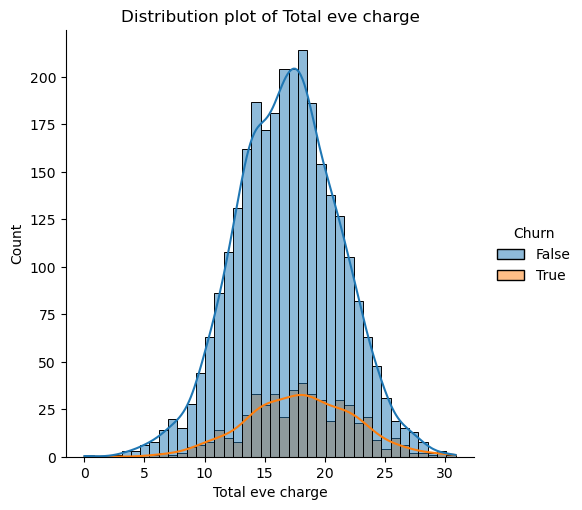

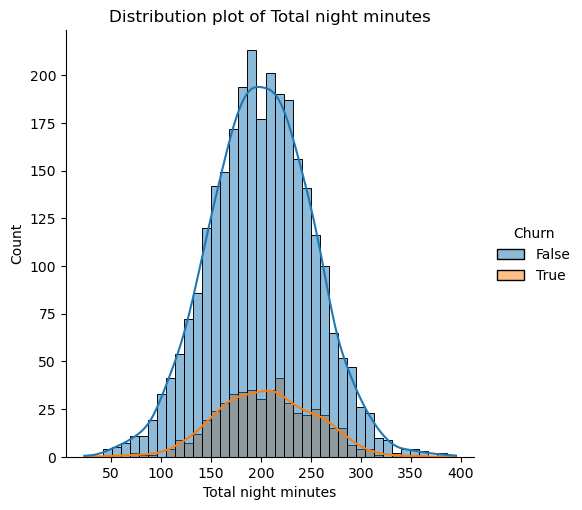

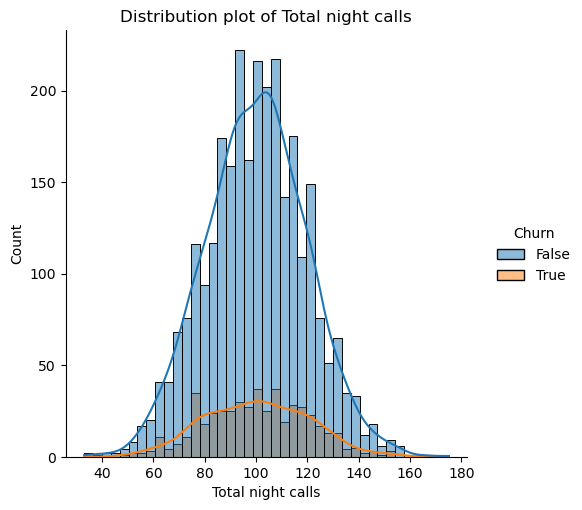

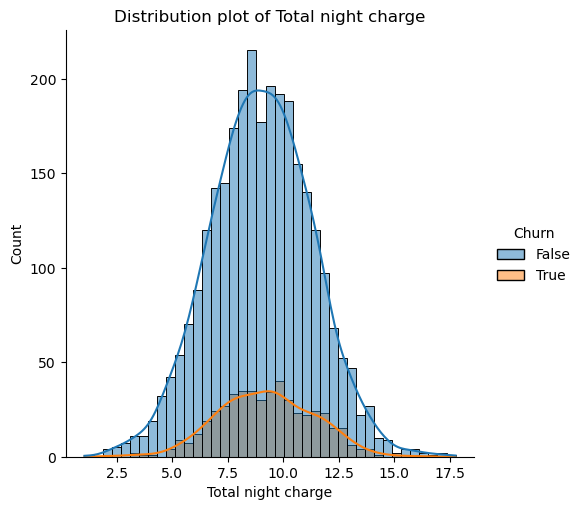

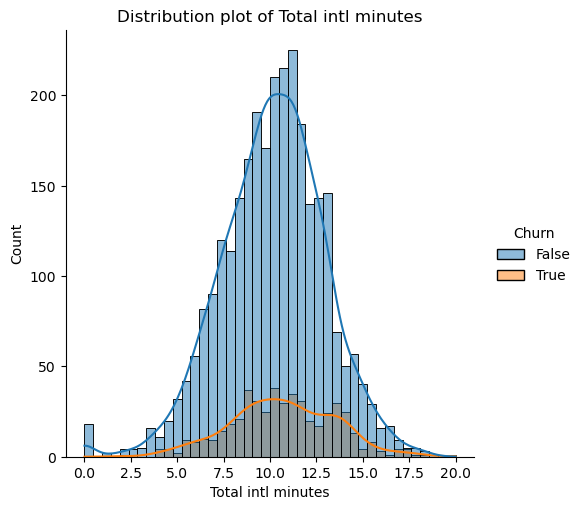

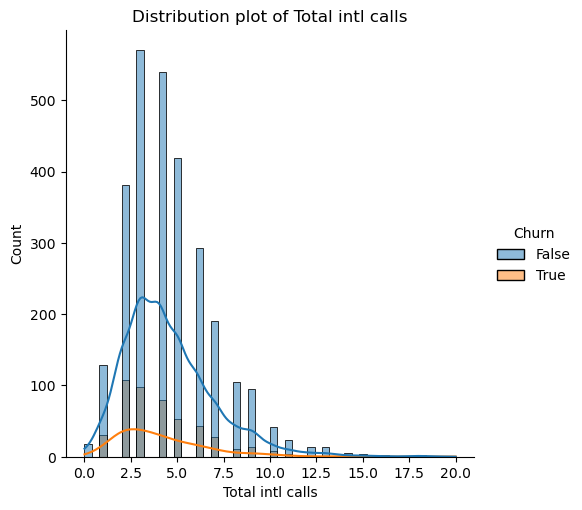

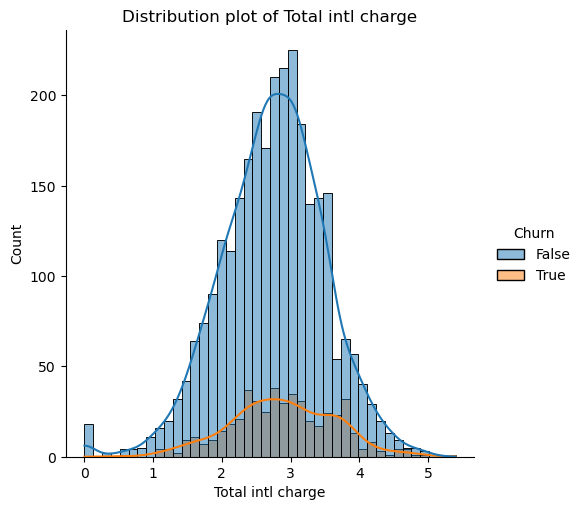

In [8]:
cols = df.select_dtypes(['int', 'float']).drop(columns=['Area code', 'Customer service calls']).columns
for col in cols:
    sns.displot(data=df, x=col, kde = True, hue='Churn')
    plt.title("Distribution plot of "+ col)
    plt.show()

#### insights found from the chart
From above distribution charts we can see that, all columns are symmetric distributed and mean is nearly same with median for numerical columns. Here Area code will be treated as categorical value as there are only 3 values in the particular column.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset.

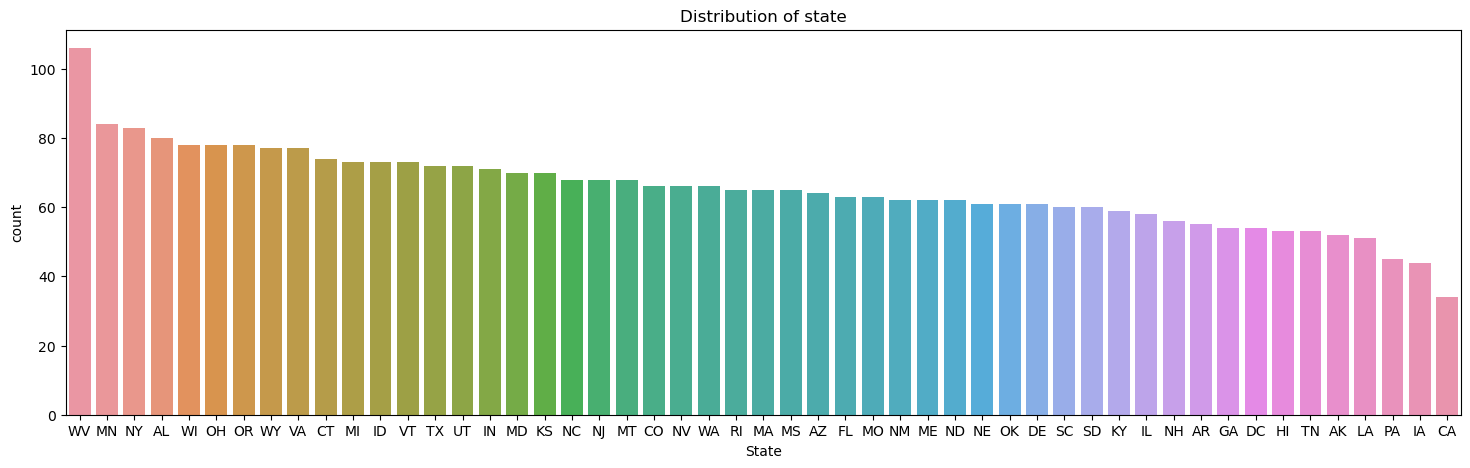

In [9]:
plt.figure(figsize=(18,5))
sns.countplot(data=df, x='State', order=df['State'].value_counts().index)
plt.title('Distribution of state')
plt.show()

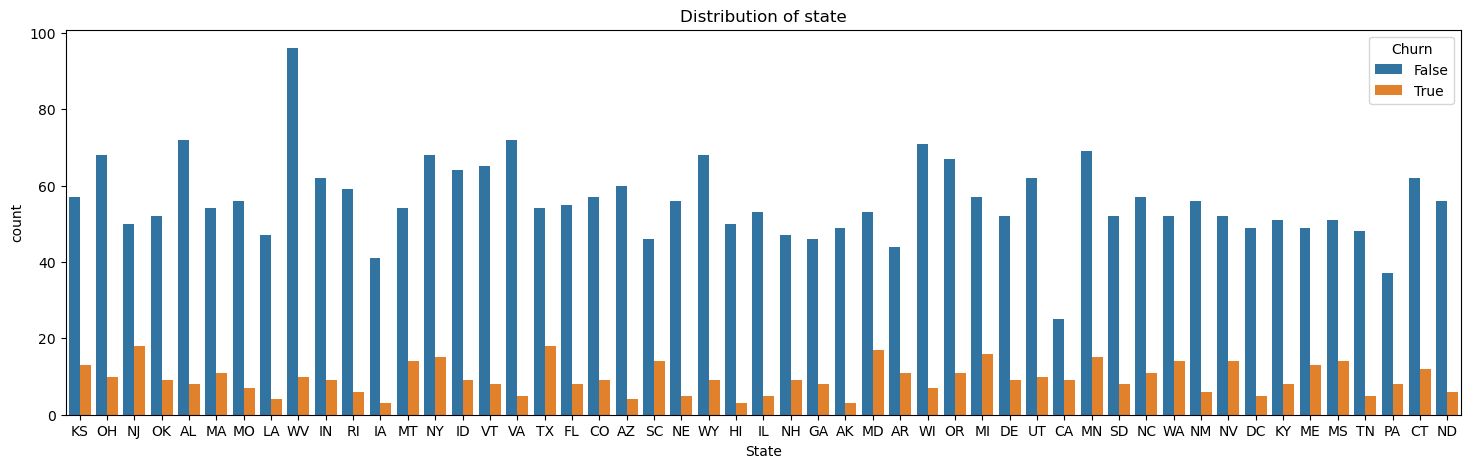

In [10]:
plt.figure(figsize=(18,5))
sns.countplot(data=df, x='State', hue='Churn')
plt.title('Distribution of state')
plt.show()

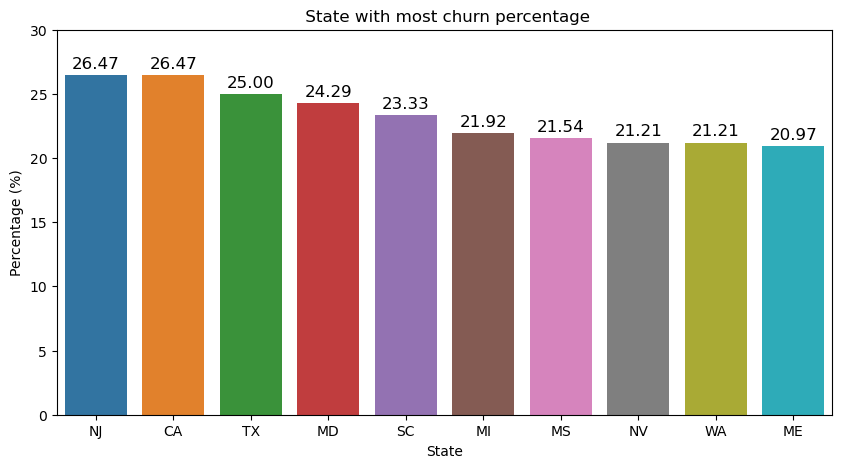

In [11]:
bar1 = (df.groupby(['State'])['Churn'].mean()*100).sort_values(ascending=False).reset_index(name="Average True Churn ")
plt.figure(figsize=(10,5))
plot = sns.barplot(data=bar1.head(10), x ='State', y="Average True Churn ")
for bar in plot.patches:
    plot.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

plt.title(" State with most churn percentage")
plt.ylabel('Percentage (%)')
plt.ylim(0,30)
plt.show()

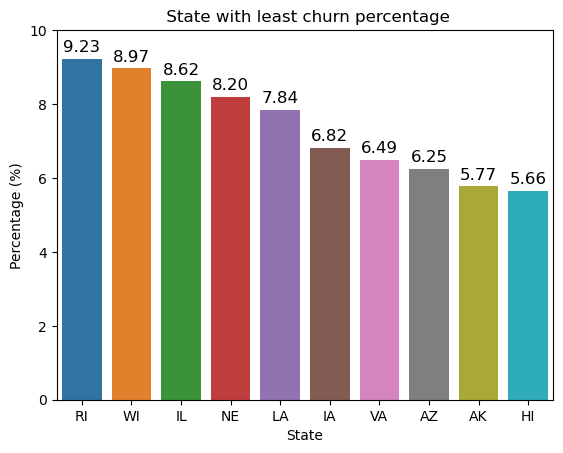

In [12]:
plot = sns.barplot(data=bar1.tail(10), x='State', y="Average True Churn ")
for bar in plot.patches:
    plot.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" State with least churn percentage")
plt.ylabel('Percentage (%)')
plt.ylim(0,10)
plt.show()

### insights found from the chart
There are 51 states having different churn rates .

CA, NJ ,TX , MD ,SC ,MI, MS, NV, WA, ME are the ones who have higher churn rate more than 20% which is more than 50% of average churn rate.

And HI, AK, AZ, VA, IA, LA, NE, IL, WI, RI are the ones who have lower churn rate which is less than 10%.

the data of state wise churning depicts that there are lot of states who are having average churn rate more than 20 % which needs to be studied and look for further analysis to decide which factor are causing the churn.

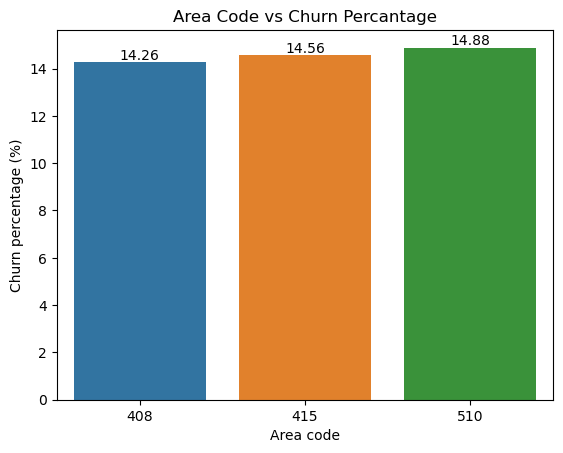

In [13]:
a1= df['Area code'].unique()
b1= df.groupby('Area code')['Churn'].mean()*100

plot = sns.barplot(x=a1, y=b1)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
plt.title('Area Code vs Churn Percantage')
plt.xlabel('Area code')
plt.ylabel('Churn percentage (%)')
plt.show()

### insights found from the chart?
All Area Code have around 14% Churn rate. So, Area Code doesn't matter.

No, Area Code doesn't have any contribution to churn rate for 14% churn rate is same for all the area codes. But while furthur sagreggating the area codes with respective states in those area code, it can be analysed the states in which the issue is happeing. So, it has been defined above.

So, here Area code won't help to create business impact but the respective states wise analysis can help.

In [14]:
value = df['International plan'].value_counts()

fig = go.Figure(data=[go.Pie(labels=['No','Yes'], values=value)])
fig.update_layout(title_text='Distribution of International plan')
fig.update_traces(marker=dict(colors=['#ffd700', '#008000']))

In [15]:
i1 = df['International plan'].unique()
i2 = df.groupby('International plan')['Churn'].mean()*100
i3 = df.groupby(['International plan'])['Total intl charge'].mean()
i4 = df.groupby(["Churn"])['Total intl minutes'].mean()

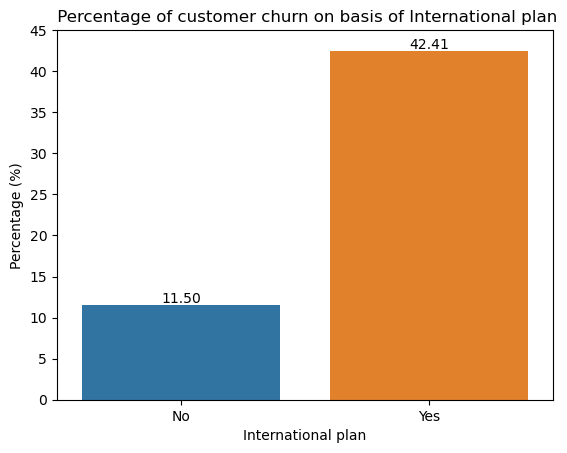

In [16]:
plot = sns.barplot(x=i1,y=i2)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

plt.title(" Percentage of customer churn on basis of International plan")
plt.xlabel('International plan')
plt.ylabel('Percentage (%)')
plt.ylim(0,45)
plt.show()

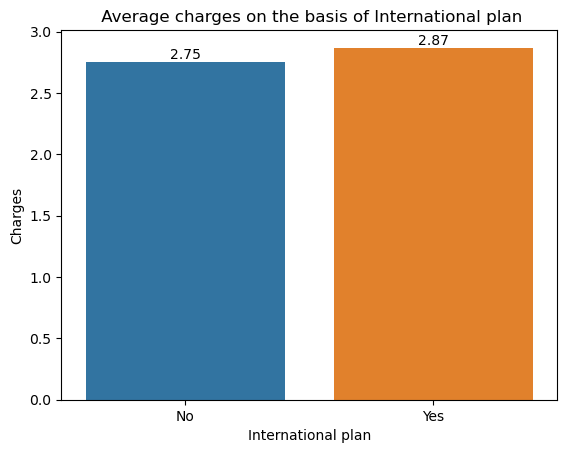

In [17]:
plot = sns.barplot(x=i1,y=i3)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
plt.title(" Average charges on the basis of International plan")
plt.xlabel('International plan')
plt.ylabel('Charges')
plt.show()

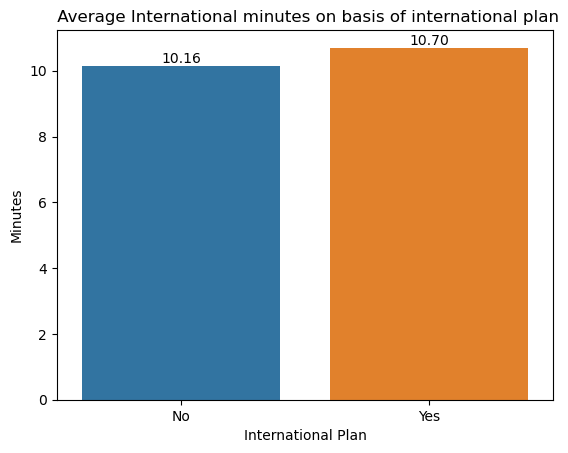

In [18]:
plot = sns.barplot(x=i1,y=i4)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
plt.title(" Average International minutes on basis of international plan")
plt.xlabel('International Plan')
plt.ylabel('Minutes')
plt.show()

#### insight(s) found from the chart?

In this analysis, 3010 dont have an international plan, 323 have an international plan.

Among those who have an international plan, 42.4 % people churn.
Whereas among those who dont have an international plan, only 11.4 % people churn.
Among those who have a international plan their average charge is 2.87 and they talk for 10.7 minutes on an average.
Whereas among those who dont have a international plan their average charge is 2.75 and they talk for 10.16 minutes on an average.

The reason why people having international plan might be leaving is that they are paying same amount of money for international calls as for those customers who dont have a international plan. Hence they arent getting any benefits for having an international plan so they might be unhappy.

the insights found will definitely help for a positive business impact. Those people who have international plan they are paying some additional charges to get the plan but the talk time value charge is same as those customers having no international plan. That might be great reason for more churns for those having international plan.

In [19]:
value = df['Voice mail plan'].value_counts()

fig = go.Figure(data=[go.Pie(labels=['No','Yes'], values=value)])
fig.update_layout(title_text='Distribution of customers having voice mail plan')
fig.update_traces(marker=dict(colors=['#ffd700', '#008000']))

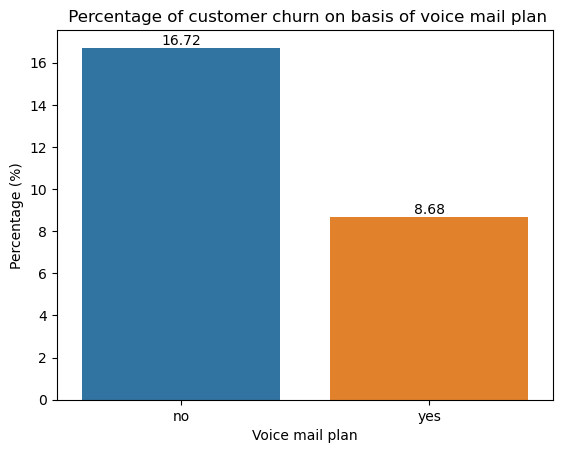

In [20]:
cc1 = list(['no','yes'])
cc2 = df.groupby('Voice mail plan')['Churn'].mean()*100

plot = sns.barplot(x=cc1,y=cc2)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

plt.title(" Percentage of customer churn on basis of voice mail plan")
plt.xlabel('Voice mail plan')
plt.ylabel('Percentage (%)')
plt.show()

#### insights found from the chart

2411 dont have a voice mail plan
922 have a voice mail plan
Among those who dont have a voice mail 16.7 % people churn.
Whereas among those who have a voice mail plan only 8.7 % people churn.

Customers with the Voice Mail Plan tend to churn less frequently

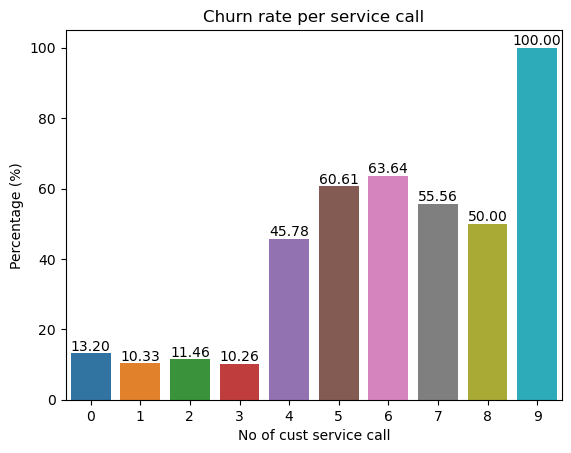

In [21]:
service = pd.DataFrame(df.groupby('Customer service calls')['Churn'].mean()*100)

plot = sns.barplot(x=service.index, y=service['Churn'])
for bar in plot.patches:
    plot.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
plt.title("Churn rate per service call")
plt.xlabel('No of cust service call')
plt.ylabel('Percentage (%)')
plt.show()

#### insights found from the chart

The service calls of customers varies from 0 to 9 .
Those customers who make more service calls they have a high probability of leaving.
As we can see from graph , customers with more than 5, their churning rate is more.
Hence customers who make more than 5 service calls, their queries should be solved immediately and they should be given better service so that they dont leave the company.
Customers with four or more customer service calls churn more than four times as often as do the other customers

Customer service is an essential factor for every business. So definitely good customer service will have a positive impact to the business. We have to look after the customer calls and customer query report resolution duration. Need to optimize the time period. If one type of issue is coming from more than 5 customers, root cause analysis should be done on that same issue and should be resolved for everyone. Need to reduce the calls for each customer and he should be satisfied in a single call only. The customer service agents should be given great offer or recognition over great performance of customer issue resolution.

In [22]:
df['Total calls'] = df.loc[:,['Total day calls','Total eve calls', 'Total night calls']].sum(axis=1)
df['Total mins'] = df.loc[:,['Total day minutes','Total eve minutes', 'Total night minutes']].sum(axis=1)
df['Total charge'] = df.loc[:,['Total day charge','Total eve charge', 'Total night charge']].sum(axis=1)

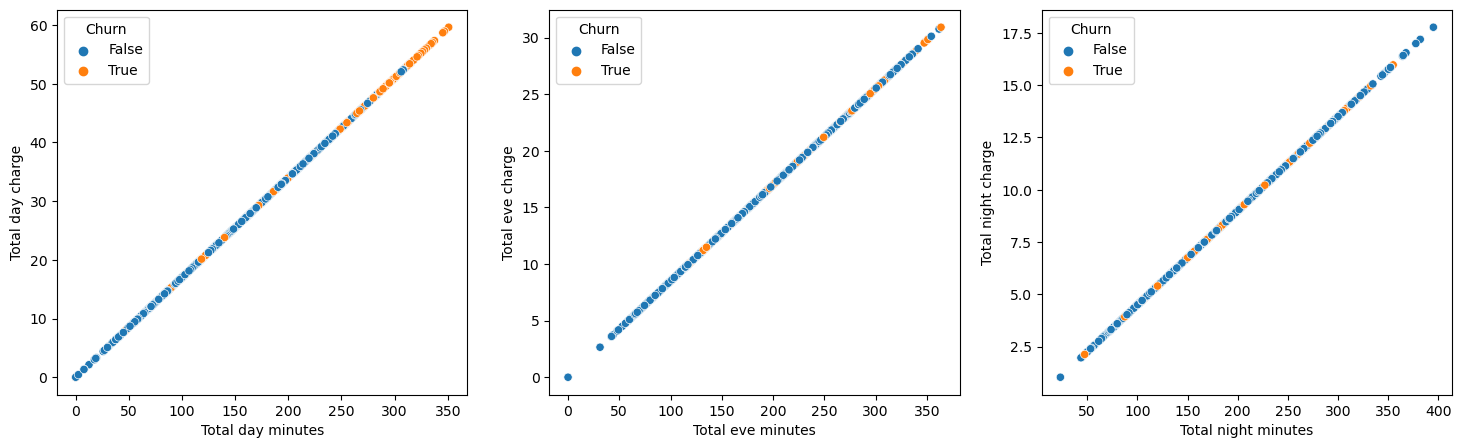

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(18,5))
sns.scatterplot(data=df, x='Total day minutes', y='Total day charge', hue='Churn', ax = axes[0])
sns.scatterplot(data=df, x='Total eve minutes', y='Total eve charge', hue='Churn', ax = axes[1])
sns.scatterplot(data=df, x='Total night minutes', y='Total night charge', hue='Churn', ax = axes[2])
plt.show()

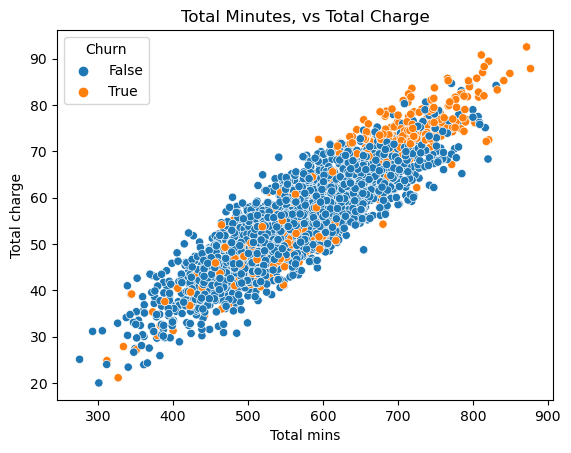

In [24]:
sns.scatterplot(data=df, x="Total mins", y="Total charge", hue="Churn")
plt.title('Total Minutes, vs Total Charge')
plt.show()

#### insights found from the chart
Churn customers speak more minutes that non-churn customers at day,evening and night. Hence they pay more charge that non-churn customers.

We can retain churn customers if we include master plan.
In master plan if a customer is talking more minutes then we can charge a little less amount from him or he can get discount or additional few free minutes to talk.

This will make customers who are going to churn happy and they will not leave the company.

For telecom service provider calling and messaging are two essential product plans. Thus, optimizing voice call plans will definitely create a business impact. Those who are using just calling service must be provided some additional offers either in talktime or powerplus plan. Those who use voice call plan for night only, we might offer some exciting plans from midnight 12 to morning 6. For customers those who have higher accout length should be provided exciting offers as they are our loyal customers. Churing of higher account length customer will have a negative impact on business.


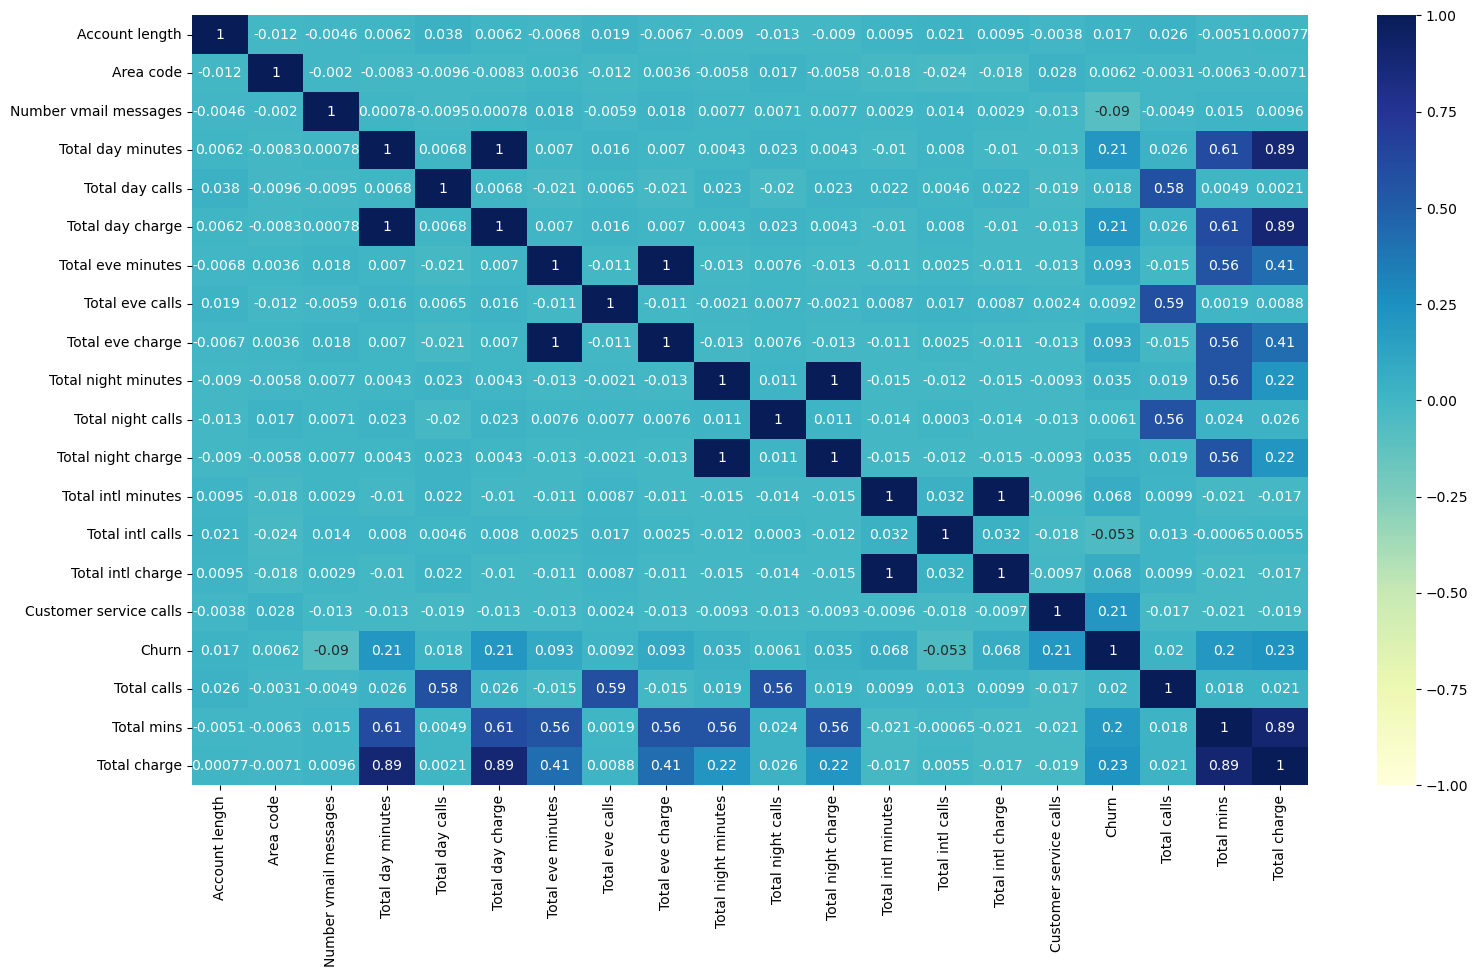

In [25]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), vmin = -1,vmax=1, annot = True, cmap="YlGnBu")
plt.show()

#### insights found from the chart
From the above correlation heatmap, we can see total day charge & total day minute, total evening charge & total evening minute, total night charge & total night minute are positiveliy highly correlated with a value of 1.

Customer service call is positively correlated only with area code and negative correlated with rest variables.

Rest all correlation can be depicted from the above chart.

In [27]:
churn_df = df[df['Churn']==True]
Area_state_churn = churn_df.groupby(['Area code'])['State'].unique().reset_index(name='Unique state')
Area_state_churn

Area code                                       Unique state
0        408  [CO, AZ, MD, NY, IN, MS, VT, VA, KS, SD, RI, O...
1        415  [IN, NY, ID, WY, DC, NJ, LA, NV, MS, OH, AK, M...
2        510  [TX, ME, MS, FL, MN, OK, SD, WI, DE, KS, OH, W...

In [36]:
inter_1= set(Area_state_churn.loc[0,'Unique state']).intersection(set(Area_state_churn.loc[1,'Unique state']))
poor_connectivity_states = set(inter_1).intersection(set(Area_state_churn.loc[2,'Unique state']))

print(poor_connectivity_states)
print(len(poor_connectivity_states))

{'WI', 'WA', 'OK', 'NJ', 'IL', 'SD', 'MO', 'MD', 'MN', 'NY', 'GA', 'OR', 'MT', 'MI', 'PA', 'KY', 'TX', 'UT', 'OH', 'VA', 'CA', 'SC', 'NV', 'KS', 'MA', 'ME', 'WV', 'NC', 'AL', 'IN', 'NH', 'ND', 'CT', 'MS', 'VT', 'AR', 'TN', 'AZ'}
38


#### insights
there are 38 poor connectivity states

the states are ('WI', 'WA', 'OK', 'NJ', 'IL', 'SD', 'MO', 'MD', 'MN', 'NY', 'GA', 'OR', 'MT', 'MI', 'PA', 'KY', 'TX', 'UT', 'OH', 'VA', 'CA', 'SC', 'NV', 'KS', 'MA', 'ME', 'WV', 'NC', 'AL', 'IN', 'NH', 'ND', 'CT', 'MS', 'VT', 'AR', 'TN', 'AZ')

## Solution to Business Objective

**Solution to Reduce Customer Churn**

*	Modify International Plan as the charge is same as normal one.
*	Be proactive with communication.
*	Ask for feedback often.
*	Periodically throw Offers to retain customers.
*	Look at the customers facing problem in  the most churning states.
*	Lean into  best customers. 
*	Regular Server Maintenance.
*	Solving Poor Network Connectivity Issue.
*	Define a roadmap for new customers.
*	Analyze churn when it happens.
*	Stay competitive.

# Conclusion

The telecommunications market is already well-established, and the rate of new
customers is slow. As a result, companies in this industry prioritize retention and
reducing customer churn. This project analyzed a churn dataset to identify the
main factors contributing to churn and gain valuable insights. Through exploratory
data analysis, we were able to gain insight into the churn dataset, listed below:

1. The four charge fields are directly related to the minute fields.

2. The area code may not be relevant and can be excluded.

3. Customers with the International Plan tend to churn more often.

4. Customers who have had four or more customer service calls churn significantly more than other customers.

5. Customers with high day and evening minute usage tend to churn at a higher rate.

6. There is no clear relationship between churn and the variables such as day calls, evening calls, night calls, international calls, night minutes, international minutes, account length, or voice mail messages.